In [1]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.image as image

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection


ff1.Cache.enable_cache('cache') 

In [2]:
year = int(input('Año: '))
wknd = int(input('Round: '))
driver1 =  'VER'
ses = 'FP1'

Año: 2022
Round: 21


In [3]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver1).pick_fastest()    

core           INFO 	Loading data for São Paulo Grand Prix - Practice 1 [v2.2.8]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            

In [4]:
# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']  


In [5]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

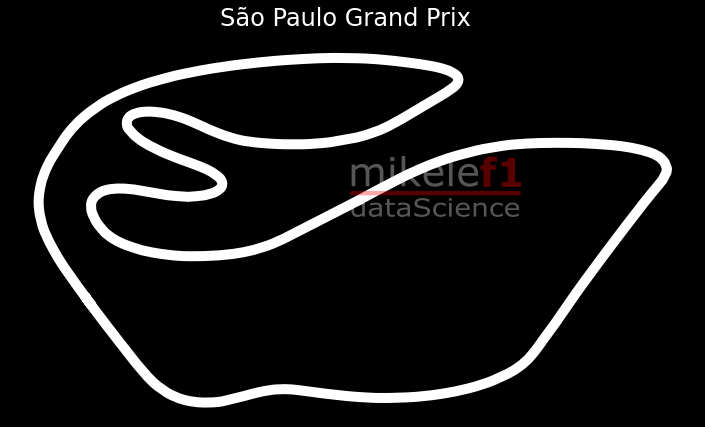

In [6]:
# We create a plot with title and adjust some setting to make it look good.
#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

#Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]

plt.suptitle(f"{session.event['EventName']}  \n"
             , size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='white', linestyle='-', linewidth=10, zorder=0)


fig.figimage(im, xo=350, yo=210, zorder=13, alpha=.35)



# Show the plot

nombrearchivo = str(year)+'-'+str(wknd)+'-Circuit'+'.png'
plt.savefig(nombrearchivo)
plt.show()